<a href="https://colab.research.google.com/github/ALK26/Projects/blob/master/Explore_NY_Housing_Complaints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd  
df = pd.read_csv('https://cocl.us/311_NYC_Dataset') 
df.head() 

,Unnamed: 0,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
0,0,45531130,02/02/2020 06:09:17 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10019.0,426 WEST 52 STREET,WEST 52 STREET,ADDRESS,NEW YORK,Open,The following complaint conditions are still o...,MANHATTAN,40.765132,-73.988993
1,1,45529784,02/02/2020 02:15:24 PM,NaN,UNSANITARY CONDITION,RESIDENTIAL BUILDING,11204.0,1751 67 STREET,67 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.618484,-73.992673
2,2,45527528,02/02/2020 02:27:41 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11372.0,87-15 37 AVENUE,37 AVENUE,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.750269,-73.879432
3,3,45530329,02/02/2020 12:13:18 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.853773,-73.881558
4,4,45528814,02/02/2020 01:59:44 PM,NaN,APPLIANCE,RESIDENTIAL BUILDING,11209.0,223 78 STREET,78 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.629745,-74.030533


In [ ]:
df["Complaint Type"].unique() 

array(['HEAT/HOT WATER', 'UNSANITARY CONDITION', 'APPLIANCE', 'GENERAL',
       'ELECTRIC', 'PLUMBING', 'PAINT/PLASTER', 'WATER LEAK', 'SAFETY',
       'DOOR/WINDOW', 'OUTSIDE BUILDING', 'ELEVATOR', 'FLOORING/STAIRS',
       'Unsanitary Condition', 'HPD Literature Request', 'HEATING',
       'PAINT - PLASTER', 'Safety', 'Electric', 'General', 'Appliance',
       'GENERAL CONSTRUCTION', 'NONCONST', 'CONSTRUCTION', 'AGENCY',
       'STRUCTURAL', 'VACANT APARTMENT', 'Outside Building', 'Plumbing',
       'Mold'], dtype=object)

In [ ]:
print(df.shape)

(6019843, 16)


In [ ]:
df.sort_values(by=["Created Date"])

,Unnamed: 0,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
177182,177182,15634460,01/01/2010 02:31:13 PM,01/02/2010 02:35:01 PM,HPD Literature Request,NaN,NaN,NaN,NaN,NaN,NaN,Closed,The literature will be emailed within 24 hours...,Unspecified,NaN,NaN
177179,177179,15634698,01/01/2010 02:39:02 PM,01/04/2010 01:20:45 PM,HPD Literature Request,NaN,NaN,NaN,NaN,NaN,NaN,Closed,The literature has been mailed. If it has not ...,Unspecified,NaN,NaN
177186,177186,15633862,01/01/2010 04:18:46 PM,01/04/2010 01:20:46 PM,HPD Literature Request,NaN,NaN,NaN,NaN,NaN,NaN,Closed,The literature has been mailed. If it has not ...,Unspecified,NaN,NaN
177188,177188,15633410,01/01/2010 04:59:23 PM,01/02/2010 05:02:49 PM,HPD Literature Request,NaN,NaN,NaN,NaN,NaN,NaN,Closed,The literature will be emailed within 24 hours...,Unspecified,NaN,NaN
177180,177180,15634558,01/01/2010 05:00:01 AM,01/04/2010 01:20:48 PM,HPD Literature Request,NaN,NaN,NaN,NaN,NaN,NaN,Closed,The literature has been mailed. If it has not ...,Unspecified,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62668,62668,45284115,12/31/2019 12:57:51 AM,12/31/2019 09:21:04 PM,HEAT/HOT WATER,RESIDENTIAL BUILDING,11230.0,788 EAST 10 STREET,EAST 10 STREET,ADDRESS,BROOKLYN,Closed,The Department of Housing Preservation and Dev...,BROOKLYN,40.630019,-73.967198
76629,76629,45281616,12/31/2019 12:58:50 PM,NaN,WATER LEAK,RESIDENTIAL BUILDING,11377.0,41-42 66 STREET,66 STREET,ADDRESS,Woodside,Open,The following complaint conditions are still o...,QUEENS,40.743974,-73.898007
6410,6410,45284092,12/31/2019 12:59:01 PM,01/21/2020 09:01:40 AM,GENERAL,RESIDENTIAL BUILDING,10030.0,123 WEST 135 STREET,WEST 135 STREET,ADDRESS,NEW YORK,Closed,The Department of Housing Preservation and Dev...,MANHATTAN,40.814545,-73.941869
6764,6764,45280065,12/31/2019 12:59:06 PM,01/10/2020 01:42:41 PM,WATER LEAK,RESIDENTIAL BUILDING,10032.0,547 WEST 160 STREET,WEST 160 STREET,ADDRESS,NEW YORK,Closed,The Department of Housing Preservation and Dev...,MANHATTAN,40.835295,-73.941977


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019843 entries, 0 to 6019842
Data columns (total 16 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unnamed: 0              int64  
 1   Unique Key              int64  
 2   Created Date            object 
 3   Closed Date             object 
 4   Complaint Type          object 
 5   Location Type           object 
 6   Incident Zip            float64
 7   Incident Address        object 
 8   Street Name             object 
 9   Address Type            object 
 10  City                    object 
 11  Status                  object 
 12  Resolution Description  object 
 13  Borough                 object 
 14  Latitude                float64
 15  Longitude               float64
dtypes: float64(3), int64(2), object(11)
memory usage: 734.8+ MB


In [ ]:
missing_data = df.isnull()
missing_data.head()

,Unnamed: 0,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
for column in missing_data.columns.values.tolist(): 
    print(column) 
    print (missing_data[column].value_counts()) 
    print("")     

Unnamed: 0
False    6019843
Name: Unnamed: 0, dtype: int64

Unique Key
False    6019843
Name: Unique Key, dtype: int64

Created Date
False    6019843
Name: Created Date, dtype: int64

Closed Date
False    5893186
True      126657
Name: Closed Date, dtype: int64

Complaint Type
False    6019843
Name: Complaint Type, dtype: int64

Location Type
False    5967019
True       52824
Name: Location Type, dtype: int64

Incident Zip
False    5939146
True       80697
Name: Incident Zip, dtype: int64

Incident Address
False    5967018
True       52825
Name: Incident Address, dtype: int64

Street Name
False    5967018
True       52825
Name: Street Name, dtype: int64

Address Type
False    5935078
True       84765
Name: Address Type, dtype: int64

City
False    5939569
True       80274
Name: City, dtype: int64

Status
False    6019843
Name: Status, dtype: int64

Resolution Description
False    6012017
True        7826
Name: Resolution Description, dtype: int64

Borough
False    6019843
Name: Borough

In [ ]:
# examine the types of the column labels
all(isinstance(column, str) for column in df.columns)

True

In [ ]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

# view the first five elements and see how the dataframe was changed
df.head()

,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
0,45531130,02/02/2020 06:09:17 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10019.0,426 WEST 52 STREET,WEST 52 STREET,ADDRESS,NEW YORK,Open,The following complaint conditions are still o...,MANHATTAN,40.765132,-73.988993
1,45529784,02/02/2020 02:15:24 PM,NaN,UNSANITARY CONDITION,RESIDENTIAL BUILDING,11204.0,1751 67 STREET,67 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.618484,-73.992673
2,45527528,02/02/2020 02:27:41 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11372.0,87-15 37 AVENUE,37 AVENUE,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.750269,-73.879432
3,45530329,02/02/2020 12:13:18 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.853773,-73.881558
4,45528814,02/02/2020 01:59:44 PM,NaN,APPLIANCE,RESIDENTIAL BUILDING,11209.0,223 78 STREET,78 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.629745,-74.030533


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
res = df["Resolution Description"].value_counts().to_frame()
res

,Resolution Description
The Department of Housing Preservation and Development inspected the following conditions. No violations were issued. The complaint has been closed.,1698990
The Department of Housing Preservation and Development inspected the following conditions. Violations were issued. Information about specific violations is available at www.nyc.gov/hpd.,1024579
"The Department of Housing Preservation and Development was not able to gain access to inspect the following conditions. The complaint has been closed. If the condition still exists, please file a new complaint.",821533
The complaint you filed is a duplicate of a condition already reported by another tenant for a building-wide condition. The original complaint is still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection of your unit if the original complainant is not available for verification.,478553
"The Department of Housing Preservation and Development responded to a complaint of no heat or hot water and was advised by a tenant in the building that heat and hot water had been restored. If the condition still exists, please file a new complaint.",417001
...,...
More than one complaint was received for this building-wide condition.This complaint status is for the initial complaint.The Department of Housing Preservation and Development inspected the following conditions. Violations were previously issued for these conditions. Information about specific violations is available at w,1
More than one complaint was received for this building-wide condition.This complaint status is for the initial complaint.The Department of Housing Preservation and Development responded to a complaint of no heat or hot water and was advised by a tenant in the building that heat and hot water had been restored. If the condit,1
More than one complaint was received for this building-wide condition.This complaint status is for the initial complaint.The Department of Housing Preservation and Development inspected the following conditions. Violations were previously issued for these conditions. Information about specific violations is available at www.nyc.g,1
"More than one complaint was received for this building-wide condition.This complaint status is for the initial complaint.The Department of Housing Preservation and Development responded to a complaint of no heat or hot water. Heat was not required at the time of the inspection. No violations were issued. If the condition still exists, please file a",1


In [ ]:
complaint = df["Complaint Type"].value_counts().to_frame()
complaint

,Complaint Type
HEAT/HOT WATER,1261574
HEATING,887850
PLUMBING,711130
GENERAL CONSTRUCTION,500863
UNSANITARY CONDITION,451643
PAINT - PLASTER,361257
PAINT/PLASTER,346438
ELECTRIC,307310
NONCONST,260890
DOOR/WINDOW,205278


In [ ]:
most_area = df["Borough"].value_counts()
most_area



BROOKLYN         1739886
BRONX            1617956
MANHATTAN        1055225
Unspecified       873221
QUEENS            645971
STATEN ISLAND      87584
Name: Borough, dtype: int64

In [ ]:
created = df["Created Date"].value_counts()
created


01/24/2013 12:00:00 AM    7581
01/08/2015 12:00:00 AM    7175
01/07/2014 12:00:00 AM    6984
02/16/2015 12:00:00 AM    6382
01/08/2014 12:00:00 AM    6153
                          ... 
12/29/2016 02:46:32 PM       1
08/07/2018 10:39:07 AM       1
08/15/2015 12:47:06 PM       1
05/25/2017 03:57:01 PM       1
05/09/2018 11:47:30 PM       1
Name: Created Date, Length: 1675132, dtype: int64

In [ ]:
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df["Created Date"].tail()

6019838    10/15/2019 10:35:45 AM
6019839    10/15/2019 06:09:28 AM
6019840    10/15/2019 10:54:45 AM
6019841    10/15/2019 02:07:34 PM
6019842    10/15/2019 11:29:01 AM
Name: Created Date, dtype: object

In [ ]:
location_type = df["Location Type"].value_counts()
location_type

RESIDENTIAL BUILDING    5959910
Residential Building       7098
Apartment                     5
Building-Wide                 4
Public Area                   2
Name: Location Type, dtype: int64

In [ ]:
city_types = df["City"].value_counts()
city_types

BROOKLYN         2026580
BRONX            1860522
NEW YORK         1204417
STATEN ISLAND     101553
Jamaica            65977
                  ...   
Floral Park          208
New Hyde Park         90
FLORAL PARK           79
BREEZY POINT          53
NEW HYDE PARK         22
Name: City, Length: 89, dtype: int64

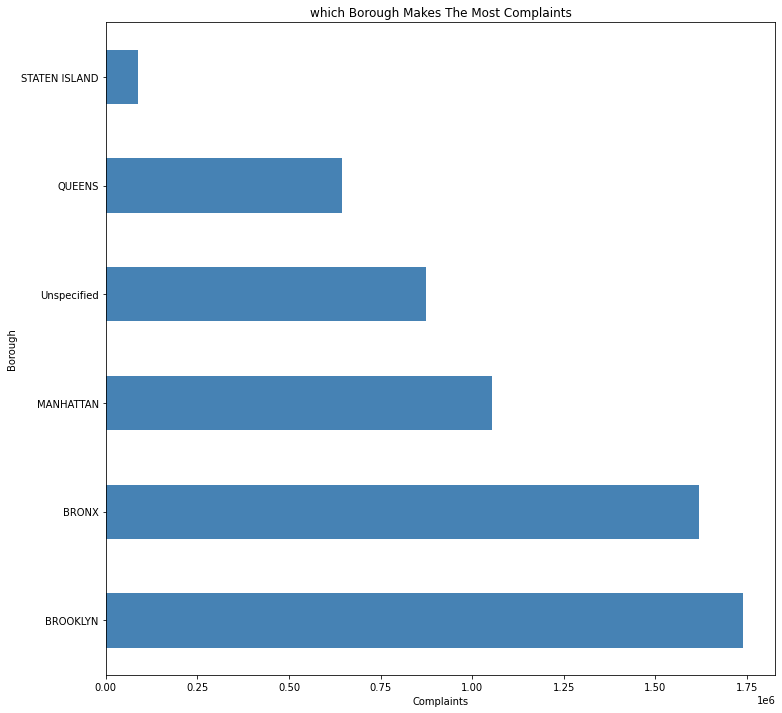

In [ ]:
most_area.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.ylabel("Borough")
plt.xlabel("Complaints")
plt.title("which Borough Makes The Most Complaints")
plt.show()

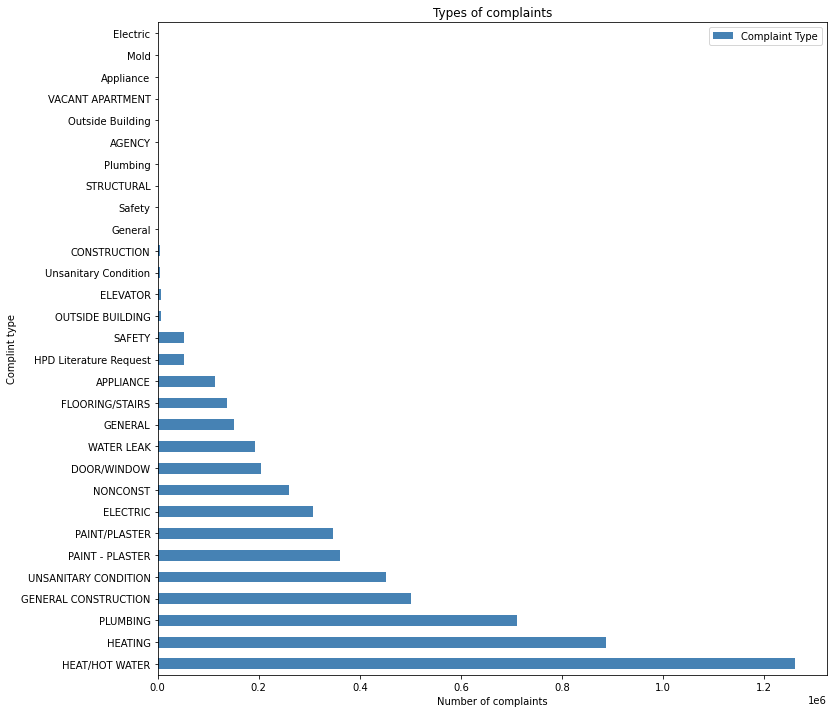

In [ ]:
complaint.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.ylabel("Complint type")
plt.xlabel("Number of complaints")
plt.title("Types of complaints")
plt.show()

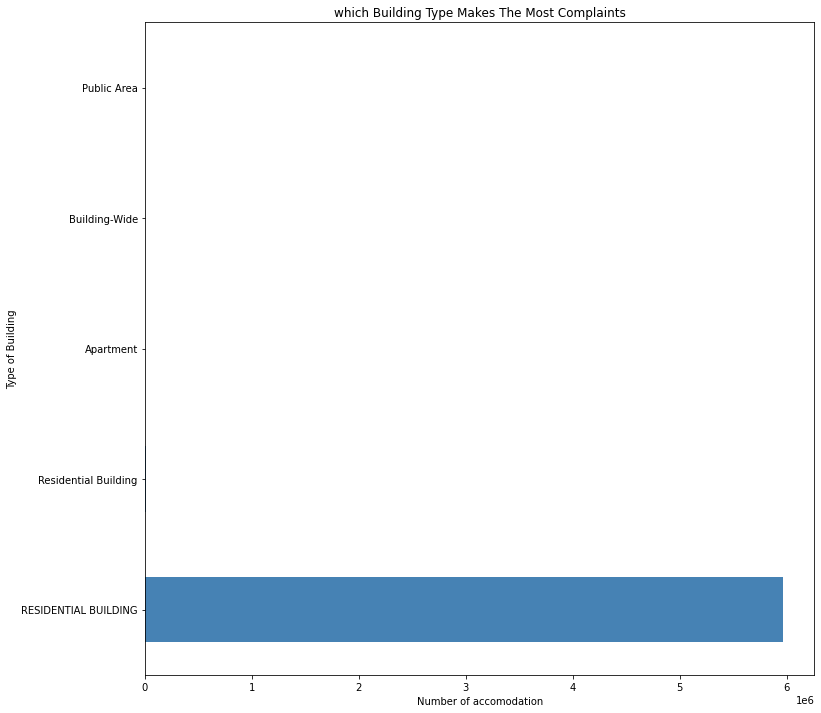

In [ ]:
location_type.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.ylabel("Type of Building")
plt.xlabel("Number of accomodation")
plt.title("which Building Type Makes The Most Complaints")
plt.show()

In [ ]:
df.dtypes

Unique Key                  int64
Created Date               object
Closed Date                object
Complaint Type             object
Location Type              object
Incident Zip              float64
Incident Address           object
Street Name                object
Address Type               object
City                       object
Status                     object
Resolution Description     object
Borough                    object
Latitude                  float64
Longitude                 float64
dtype: object

In [ ]:
df['Complaint Type'].value_counts().idxmax()

'HEAT/HOT WATER'

In [ ]:
# get indicator variables and assign it to data frame "dummy_variable_1"
dummy_variable_1 = pd.get_dummies(df["Borough"])
dummy_variable_1.head()


,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Unspecified
0,0,0,1,0,0,0
1,0,1,0,0,0,0
2,0,0,0,1,0,0
3,1,0,0,0,0,0
4,0,1,0,0,0,0


In [ ]:

! pip install seaborn
#import visualization packages "Matplotlib" and "Seaborn", don't forget about "%matplotlib inline" to plot in a Jupyter notebook.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
df.describe(include=['object'])


,Created Date,Closed Date,Complaint Type,Location Type,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough
count,6019843,5893186,6019843,5967019,5967018,5967018,5935078,5939569,6019843,6012017,6019843
unique,1675132,757706,30,5,182600,6825,1,89,5,340,6
top,01/24/2013 12:00:00 AM,11/07/2012 12:00:00 AM,HEAT/HOT WATER,RESIDENTIAL BUILDING,34 ARDEN STREET,GRAND CONCOURSE,ADDRESS,BROOKLYN,Closed,The Department of Housing Preservation and Dev...,BROOKLYN
freq,7581,7296,1261574,5959910,14298,92450,5935078,2026580,5886253,1698990,1739886


In [ ]:
df2 = df['Complaint Type'].value_counts().to_frame()
df2

,Complaint Type
HEAT/HOT WATER,1261574
HEATING,887850
PLUMBING,711130
GENERAL CONSTRUCTION,500863
UNSANITARY CONDITION,451643
PAINT - PLASTER,361257
PAINT/PLASTER,346438
ELECTRIC,307310
NONCONST,260890
DOOR/WINDOW,205278


In [ ]:
from scipy import stats

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, HEAT/HOT WATER to Electric
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Complaint Type  30 non-null     int64
dtypes: int64(1)
memory usage: 480.0+ bytes


In [ ]:
df['Closed Date'].value_counts().to_frame()


,Closed Date
11/07/2012 12:00:00 AM,7296
12/09/2010 12:00:00 AM,6264
11/28/2011 12:00:00 AM,6005
01/06/2014 12:00:00 AM,5600
01/28/2013 12:00:00 AM,5598
...,...
01/11/2018 09:31:11 AM,1
08/15/2019 10:56:20 AM,1
07/03/2017 02:24:50 AM,1
12/20/2019 11:00:57 AM,1


In [ ]:
df3= df[["Borough", "Complaint Type"]]
df3.head()

,Borough,Complaint Type
0,MANHATTAN,HEAT/HOT WATER
1,BROOKLYN,UNSANITARY CONDITION
2,QUEENS,HEAT/HOT WATER
3,BRONX,HEAT/HOT WATER
4,BROOKLYN,APPLIANCE
